In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/police.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Convertendo algumas variáveis categóricas para numéricas

As variáveis categóricas são convertidas em números para tratamento posterior.

Como as classes destas colunas são de baixa cardinalidade, podemos converter as classes em números.

Obs: Aqui o OneHotEncoder é o mais indicado para evitar a interpretação de intensidade pelo modelo. Embora para fins de avaliação  não há problemas

In [3]:
cols = [
    'driver_race',
    'driver_gender',
    'violation_raw',
    'driver_gender',
    'driver_race',
    'stop_outcome',
    'stop_duration',
    'is_arrested'
]

for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,1,1985.0,20.0,4,8,Speeding,False,NaN,2,0,0,False
1,2005-01-18,08:15,NaN,1,1965.0,40.0,4,8,Speeding,False,NaN,2,0,0,False
2,2005-01-23,23:15,NaN,1,1972.0,33.0,4,8,Speeding,False,NaN,2,0,0,False
3,2005-02-20,17:15,NaN,1,1986.0,19.0,4,1,Other,False,NaN,0,1,2,False
4,2005-03-14,10:00,NaN,0,1984.0,21.0,4,8,Speeding,False,NaN,2,0,0,False


## Verificando correlação

Correlação de Pearson aplicada e visualizada. Podemos visualizar que o tempo de parada é correlacionado se a pessoa é ou não presa.

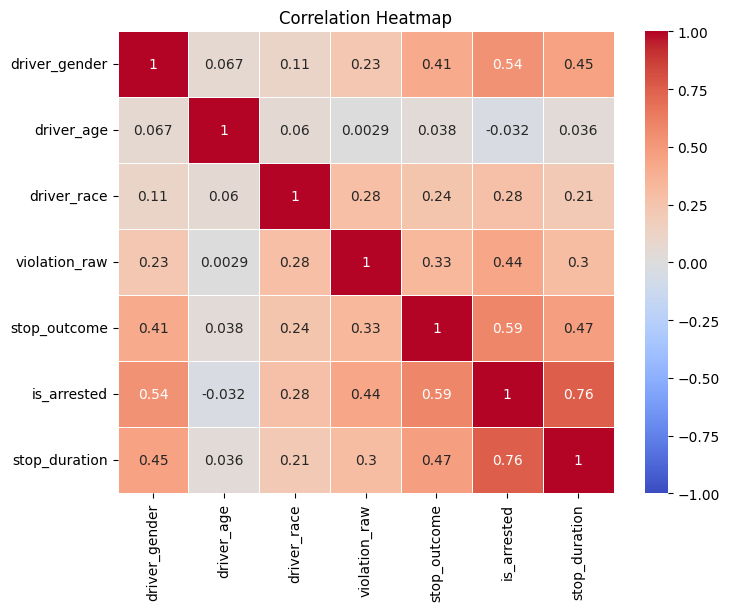

In [4]:
correlation_matrix = df[['driver_gender', 'driver_age', 'driver_race', 'violation_raw', 'stop_outcome', 'is_arrested', 'stop_duration']].corr(method='pearson')

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Verificando valores duplicados

Foi avaliado valores duplicados e removidos da base.

In [5]:
display(df[df.duplicated()])

df.drop_duplicates(inplace=True)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,2005-07-19,00:30,NaN,1,1982.0,23.0,4,8,Speeding,False,NaN,2,0,0,False
104,2005-10-03,13:26,NaN,1,1975.0,30.0,1,8,Speeding,False,NaN,0,1,4,False
117,2005-10-04,00:36,NaN,1,1961.0,44.0,4,7,Other,False,NaN,0,1,4,False
149,2005-10-05,10:00,NaN,1,1981.0,24.0,4,8,Speeding,False,NaN,2,0,0,False
239,2005-10-08,12:30,NaN,1,1978.0,27.0,4,2,Equipment,False,NaN,2,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89720,2015-10-03,22:59,NaN,0,1968.0,47.0,4,8,Speeding,False,NaN,2,0,0,False
89873,2015-10-10,08:06,NaN,2,NaN,NaN,5,12,NaN,False,NaN,6,2,5,False
90047,2015-10-16,20:37,NaN,0,1986.0,29.0,4,4,Moving violation,False,NaN,2,0,2,False
90136,2015-10-20,11:47,NaN,1,1971.0,44.0,4,2,Equipment,False,NaN,2,0,2,False


## Transformações

Para as variáveis contínuas, usaremos o Z-Score.

Para as variáveis categóricas convertidas, usaremos o Min Max como normalização.

In [6]:
df['driver_age'] = StandardScaler().fit_transform(df[['driver_age']])
df['driver_race'] = MinMaxScaler().fit_transform(df[['driver_race']])
df['violation_raw'] = MinMaxScaler().fit_transform(df[['violation_raw']])
df['stop_outcome'] = MinMaxScaler().fit_transform(df[['stop_outcome']])
df['stop_duration'] = MinMaxScaler().fit_transform(df[['stop_duration']])
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,1,1985.0,-1.100129,0.8,0.666667,Speeding,False,NaN,0.333333,0,0.0,False
1,2005-01-18,08:15,NaN,1,1965.0,0.470053,0.8,0.666667,Speeding,False,NaN,0.333333,0,0.0,False
2,2005-01-23,23:15,NaN,1,1972.0,-0.079510,0.8,0.666667,Speeding,False,NaN,0.333333,0,0.0,False
3,2005-02-20,17:15,NaN,1,1986.0,-1.178638,0.8,0.083333,Other,False,NaN,0.000000,1,0.4,False
4,2005-03-14,10:00,NaN,0,1984.0,-1.021620,0.8,0.666667,Speeding,False,NaN,0.333333,0,0.0,False
